<a href="https://colab.research.google.com/github/Rakhisharmawebsite/Rakhi-124/blob/main/OJT_project_Traffic_Sign_Classification_convolutional_neural_network_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
root_path = '/content/drive/MyDrive/dataset'

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
print(tf.__version__)

2.8.0


# Step-1 Image Prosessing 
Read Image

In [ ]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
image = plt.imread("/content/drive/MyDrive/dataset/train_set/Bicycles crossing/img14.jpg")
print(image)

[[[50 47 46]
  [38 37 42]
  [40 40 44]
  ...
  [24 24 29]
  [22 23 29]
  [20 22 28]]

 [[46 46 46]
  [38 38 46]
  [44 42 47]
  ...
  [21 22 28]
  [21 22 28]
  [21 23 29]]

 [[38 42 45]
  [40 40 47]
  [46 42 44]
  ...
  [19 21 27]
  [19 21 27]
  [20 23 29]]

 ...

 [[55 41 40]
  [43 38 38]
  [28 32 34]
  ...
  [26 28 31]
  [28 27 30]
  [31 27 29]]

 [[50 46 43]
  [42 41 38]
  [35 37 37]
  ...
  [28 30 32]
  [27 27 30]
  [28 26 29]]

 [[34 39 38]
  [32 34 34]
  [33 33 34]
  ...
  [25 28 31]
  [25 26 29]
  [26 26 29]]]


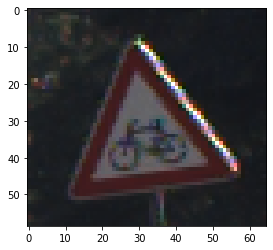

In [ ]:
imgplot = plt.imshow(image)

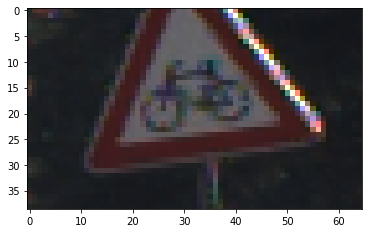

In [ ]:
crop_img = image[20:199,:200,:]    
imgplot = plt.imshow(crop_img)

# Convert Image to RGB

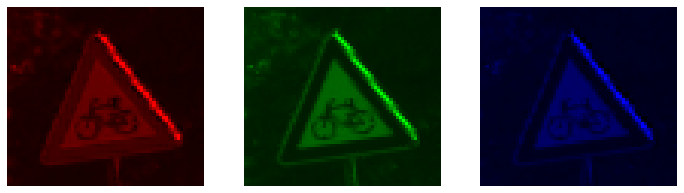

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,5))
 
for c, ax in zip(range(3), axs):
    rgb_img = np.zeros(image.shape, dtype="uint8")
    rgb_img[:,:,c] = image[:,:,c]
    ax.imshow(rgb_img)
    ax.set_axis_off()

#Normalised the Image

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


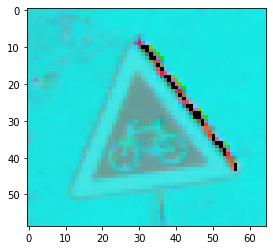

In [ ]:
def do_normalise(image):
    return -np.log(1/((1 + image)/257) - 1)
def undo_normalise(image):
    return (1 + 1/(np.exp(-image) + 1) * 257).astype("uint8")
def rotation_matrix(theta):
    return np.c_[
        [1,0,0],
        [0,np.cos(theta),-np.sin(theta)],
        [0,np.sin(theta),np.cos(theta)]
    ]
img_norm = do_normalise(image)
img_rot = np.einsum("ijk,lk->ijl", img_norm, rotation_matrix(np.pi))
img = undo_normalise(img_rot)
 
imgplot = plt.imshow(img)

# Convert Image to Grayscale  _ rgb wights 

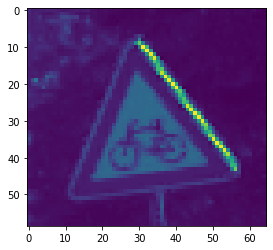

In [ ]:
rgb_weights = [0.2989, 0.5870, 0.1140]
grayscale_image = np.dot(image[...,:3], rgb_weights)
imgplot = plt.imshow(grayscale_image)

In [ ]:
def to_grayscale(image, weights = np.c_[0.2, 0.5, 0.1]):
    tile = np.tile(weights, reps=(image.shape[0],image.shape[1],1))
    return np.sum(tile * image, axis=2)

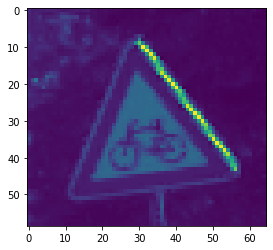

In [ ]:
rgb_weights = [0.2989, 0.5870, 0.1140]
grayscale_image = np.dot(image[...,:3], rgb_weights)
imgplot = plt.imshow(grayscale_image)

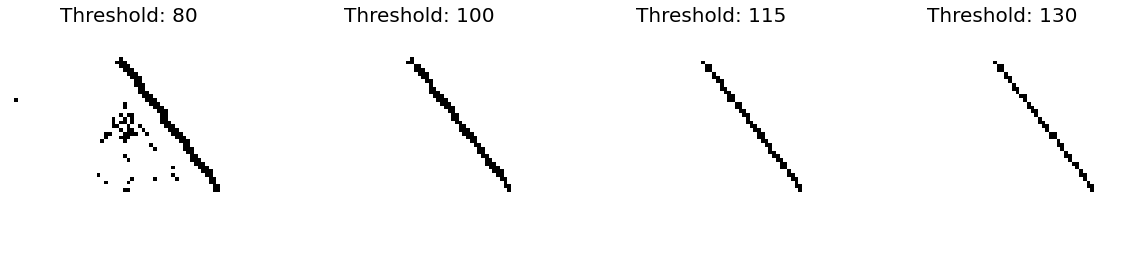

In [ ]:
def simple_threshold(image, threshold=120):
    return ((image > threshold) * 255).astype("uint8")

thresholds = [80,100,115,130]

fig, axs = plt.subplots(nrows=1, ncols=len(thresholds), figsize=(20,5));
gray_im = to_grayscale(image)
                        
for t, ax in zip(thresholds, axs):
    ax.imshow(simple_threshold(gray_im, t), cmap='Greys');
    ax.set_title("Threshold: {}".format(t), fontsize=20);
    ax.set_axis_off();

# Convolutional Neural Network

### Importing the libraries

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.__version__

'2.8.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset/train_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 956 images belonging to 43 classes.


### Preprocessing the Test set

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 431 images belonging to 43 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [ ]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [ ]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [ ]:
cnn.add(tf.keras.layers.Dense(units=43, activation='softmax'))

## Part 3 - Training the CNN

### Compiling the CNN

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [ ]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 50)

Epoch 1/50
30/30 [==============================] - 454s 15s/step - loss: 3.3659 - accuracy: 0.1370 - val_loss: 2.2756 - val_accuracy: 0.4014
Epoch 2/50
30/30 [==============================] - 4s 148ms/step - loss: 1.6569 - accuracy: 0.5502 - val_loss: 0.8570 - val_accuracy: 0.8121
Epoch 3/50
30/30 [==============================] - 4s 148ms/step - loss: 0.8178 - accuracy: 0.7981 - val_loss: 0.5301 - val_accuracy: 0.8376
Epoch 4/50
30/30 [==============================] - 4s 146ms/step - loss: 0.4684 - accuracy: 0.8891 - val_loss: 0.2494 - val_accuracy: 0.9513
Epoch 5/50
30/30 [==============================] - 4s 148ms/step - loss: 0.3129 - accuracy: 0.9142 - val_loss: 0.2197 - val_accuracy: 0.9443
Epoch 6/50
30/30 [==============================] - 4s 147ms/step - loss: 0.2274 - accuracy: 0.9487 - val_loss: 0.0982 - val_accuracy: 0.9814
Epoch 7/50
30/30 [==============================] - 4s 146ms/step - loss: 0.1639 - accuracy: 0.9644 - val_loss: 0.2884 - val_accuracy: 0.9466
Epoch 

In [ ]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 50)

Epoch 1/50
30/30 [==============================] - 4s 149ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 3.0469e-04 - val_accuracy: 1.0000
Epoch 2/50
30/30 [==============================] - 5s 152ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.1149e-04 - val_accuracy: 1.0000
Epoch 3/50
30/30 [==============================] - 5s 153ms/step - loss: 7.1938e-04 - accuracy: 1.0000 - val_loss: 1.0624e-04 - val_accuracy: 1.0000
Epoch 4/50
30/30 [==============================] - 4s 149ms/step - loss: 5.1915e-04 - accuracy: 1.0000 - val_loss: 8.8043e-05 - val_accuracy: 1.0000
Epoch 5/50
30/30 [==============================] - 4s 148ms/step - loss: 4.0093e-04 - accuracy: 1.0000 - val_loss: 8.3521e-05 - val_accuracy: 1.0000
Epoch 6/50
30/30 [==============================] - 4s 146ms/step - loss: 7.4080e-04 - accuracy: 1.0000 - val_loss: 1.1719e-04 - val_accuracy: 1.0000
Epoch 7/50
30/30 [==============================] - 4s 148ms/step - loss: 4.6594e-04 - accuracy: 1.0000 - va

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

# Visualization

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


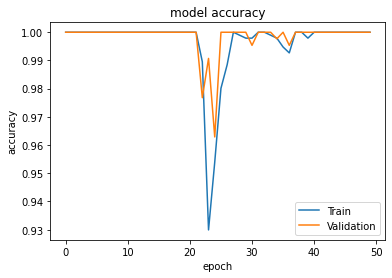

In [ ]:
import matplotlib.pylab as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

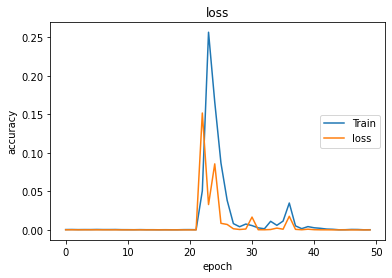

In [ ]:
import matplotlib.pylab as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'loss'], loc='center right')
plt.show()

In [ ]:
score = cnn.evaluate(test_set, verbose = 1)
print('Test Score', score[0])
print('Test Accuracy', score[1])

14/14 [==============================] - 1s 66ms/step - loss: 1.1761e-05 - accuracy: 1.0000
Test Score 1.1760977940866724e-05
Test Accuracy 1.0


In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/dataset/test_set/Ahead only/img1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices

{'Ahead only': 0,
 'Beware of oce_snow': 1,
 'Bicycles crossing': 2,
 'Bumpy road': 3,
 'Childrin crossing': 4,
 'Dangerous curv left': 5,
 'Dangerous curv right': 6,
 'Double curve': 7,
 'End of Speed_limit_80kmh': 8,
 'End of no passing': 9,
 'End of no passing veh_greaterThan_3.5 tons': 10,
 'End speed + passing limits': 11,
 'Geniral caution': 12,
 'Go straight or left': 13,
 'Go straight or right': 14,
 'Keep left': 15,
 'Keep right': 16,
 'No entry': 17,
 'No passing': 18,
 'No passing veh over 3.5 tons': 19,
 'No vehicles': 20,
 'Pedestrians': 21,
 'Priority road': 22,
 'Right-of-way at intersection': 23,
 'Road narrow on the right': 24,
 'Road work': 25,
 'Roundabout mandatory': 26,
 'Slippery road': 27,
 'Speed limit 20kmh': 28,
 'Speed limit_100kmh': 29,
 'Speed_Limit_80 kmh': 30,
 'Speed_limit _60kmh': 31,
 'Speed_limit_120kmh': 32,
 'Speed_limit_30kmh': 33,
 'Speed_limit_50kmh': 34,
 'Speed_limit_70kmh': 35,
 'Traffic signal': 36,
 'Turn left ahead': 37,
 'Turn right ahead'

In [ ]:
cnn.save_weights("/content/drive/MyDrive/dataset/cnn.h5")

In [ ]:
cnn.save("/content/drive/MyDrive/dataset/cnn.5")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/dataset/cnn.5/assets


In [ ]:
# load model
Model = cnn.load_weights('/content/drive/MyDrive/dataset/cnn.h5')
print('Model Loaded!')

Model Loaded!


## Part 4 - Making a single prediction

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/dataset/random_data/img1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Ahead only'
else:
  prediction = 'Beware of oce_snow'

In [ ]:
print(prediction)

Ahead only


# Deployment Section

In [ ]:
! pip install streamlit -q 

     |████████████████████████████████| 9.9 MB 27.0 MB/s 
     |████████████████████████████████| 164 kB 58.3 MB/s 
     |████████████████████████████████| 181 kB 56.8 MB/s 
     |████████████████████████████████| 4.3 MB 53.8 MB/s 
     |████████████████████████████████| 76 kB 5.4 MB/s 
     |████████████████████████████████| 111 kB 60.4 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 128 kB 47.1 MB/s 
     |████████████████████████████████| 793 kB 50.5 MB/s 
     |████████████████████████████████| 380 kB 60.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.28 which is incompatible.
google-colab 1.0.0 requires ipykernel~=4.10, but you have ipykernel 6.9.1 which is incompatible.
google-colab 1.0.0 requires ipyth

In [ ]:
%%writefile app.py

import streamlit as st
st.write('#Hellow')
st.write(uploaded = files.upload()
for fname in uploaded.keys():
  img_path='/content/drive/MyDrive/dataset/random_data/img1.jpg'+fname
  img = image.load_img(img_path , target_size=(150,150))
  images = image.img_to_array(img)
  images=np.expand_dims(images,axis=0)
  prediction = cnn.predict(images)
  print(fname)
  if prediction==0:
    print('Ahead Only')
  else:
    print('Beware of oce_snow'))

Writing app.py


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501

/bin/bash: streamlit: command not found
npx: installed 22 in 3.837s
your url is: https://pretty-bullfrog-35.loca.lt
